# Getting started 
I will assume that since this is open you at the very least have anaconda installed... and from this you will have some modules called numpy, matplotlib, and scipy.
Now when you run any of the code lines below you will need to select a python enviroment from the drop down in order to run it by pressing shift enter from within the cell

If you are having trouble running the first line try the commented out command bellow by deleting  the # and hitting shift enter 

In [ ]:
#!pip install ipympl 

## Using a package
Even though these modules are installed they won't be inside your enviorment (the memory used for executing code)
To bring them into your enviroment you will need to import them
Lets start off by importing a few of the most important modules and exploring what they can do for us.

In [1]:
%matplotlib widget
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as c 
import scipy.special as s
from scipy import integrate as i

#Danya has his name miss spelled 

The `as` command just gives the module an alias thats quicker to type. 
The precentage sign `%` is used to change notebook settings, in this case it forces the matplotlib package to operate in an interactive mode 
Now we have everything loaded in let's try out running something simple to show you what each module can do 

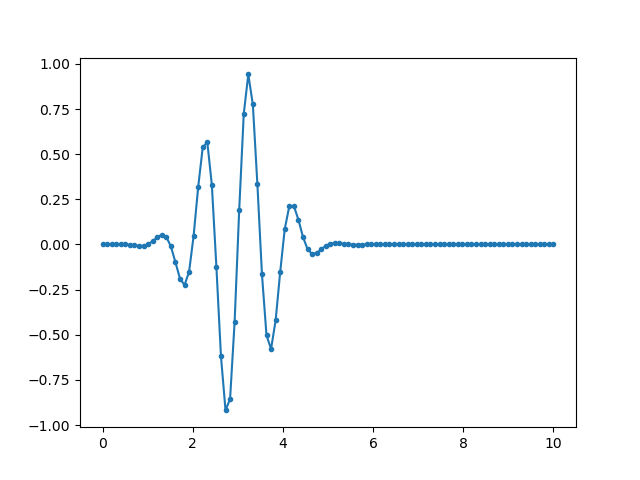

Text(0.5, 1.0, 'Pulse')

In [4]:
x = np.linspace(0,10,100)#define a set of 1000 values between 0 and 10
y = np.sin(np.pi*2*x/1)*np.exp(-(x-3)**2)#Define a y function based on those values 
plt.clf()
plt.plot(x,y,'.-')#plot those values on an unshown figure
plt.show()#show the figure 
plt.ylabel('E Field [Gauss]')
plt.xlabel('time[s]')
plt.title('Pulse')

Let's now walk through the packages we just used 

## Numpy 
or numerical python is a package that handles matrices and numerical calculations in python

The `linspace()` command is a function in numpy that jenerates a set of values linearly spaced from a minumum (0) to a maximum (10) in N steps(1000)

Other common functions are also included in numpy such as `sin()`, `cos()`, `exp()`


## matplotlib 
is a package that allows you to plot figures and handle generating videos 

The `clf` command cleans off the figure workspace

The `plot` command will draw something on a new figure 

The `show` command just forces this figure to be drawn


## Scipy 
Scientific python is a repository containing many extremely useful constants, functions and signal processing techniques 

The `special` module contains functions such as the spherical harmonics and bessel functions which bare special utility  

The `constant` module contains many important physical constants

The `integrate` module contains integration functions for 1,2, and 3d integrals  

## Example 1 
To get ourselves used to this lets start off by 
recreating one of the first figures in Bruus's book we will start of by defining a few functions ...
#### Figure 1.1c (probability densities) for hydrogen atom

In [5]:
mu = c.m_e*c.m_p/(c.m_e+c.m_p)# define the hydrogen reduced mass 
a0 = c.m_e/mu*c.value('Bohr radius') # define the Bohr radius
print(c.m_e/mu)

def rho(r,n,Z):
    """
    Reduced radial coordinate 
    r: radius 
    n: energy level 
    Z: atomic number 
    return:
    rho: reduced radius 
    """
    return 2*r*Z/(n*a0)

f = np.math.factorial# there is not a built in factorial function so i am preloading the function to the new name f 

def nconst(n,l):
    """
    Hydrogen Normalization constant
    n: energy Level 
    l: orbital angular momentum quantum number 
    
    returns:
    numerical constant: the normalization constant for the hydrogen excited state 
    """
    return np.sqrt((2/(n*a0))**3*f((n-l-1))/(2*n*f(n+l)))

def psi(r,th,phi,n,l,m,Z):
    """
    Hydrogen wave function
    r: the radial position 
    th: the azimuth 
    phi: polar angle
    
    """
    rh= rho(r,n,Z)#assign reduced radial coordinate 
    L = s.eval_genlaguerre# retreive laguer polynomal function from scipy.special 
    return nconst(n,l)*np.exp(-rh/2)*rh**l*L(n-l-1,2*l+1,rh)*s.sph_harm(m,l,phi,th) #define the Hydrogen wave function
def prob(x,y,z,n,l,m,Z):
    """
    Probablity distribution for the hydrogen wave function 
    x:absissa position in meters
    y:ordina position in meters
    z:applicate position in meters 
    n:energy Level 
    l:orbital angular momentum quantum number 
    m:the magnetic quantum number 
    return 
    probability density of the position x,y,z relative to the nucleaus 
    """
    r = np.sqrt(x**2+y**2+z**2)
    phi = np.arccos(z/r)
    th= np.sign(y)*np.arccos(x/np.sqrt(x**2+y**2))
    return np.abs(psi(r,th,phi,n,l,m,Z))**2

1.0005446170214847


The keyword `def` is used here to define a function. Whenever we want to use a function in python our first instinct should be to look for it online to see if anyone has done the hard work for us. In this case there wasn't something ready and available which solved for higher energy levels so I built something out 

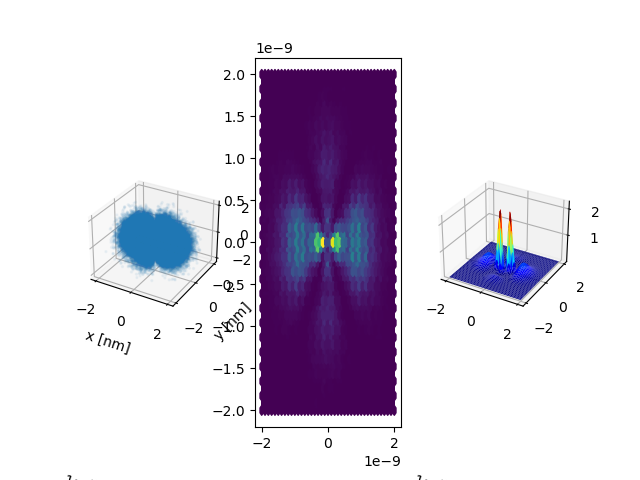

In [8]:
#set the quantum numbers for the system 
n = 4
l = 2
m = 0
#generate x y coordinate space 
x = np.linspace(-2e-9,2e-9,100)
y = np.linspace(-2e-9,2e-9,100)
z = np.linspace(-2e-9,2e-9,100)


#create a figure to draw the plot on 
fig =plt.figure()
fig.clear()
ax1 = fig.add_subplot(1,3,1,projection = '3d') #add sub axes to the figure for the 3d scater plot
ax2 = fig.add_subplot(1,3,2)# for the 2Dhistogram
ax3 = fig.add_subplot(1,3,3,projection= '3d')# for the sliced probability density


probability = [prob(xi,yi,zi,n,l,m,1) for xi in x for yi in y for zi in z]# assign a probability for each position in a flat vector 
coord = [str((xi,yi,zi)) for xi in x for yi in y for zi in z]# record the positions for the probality in a flat vector 
probability= probability/np.sum(probability)#normalize the sum to 1 should be equivalent to multiplying by DeltaX,Y,Z 
cxyz = np.random.choice(coord,size=100000,replace=True,p=probability)# choose coordinate from the list of positions with a 
                                                                     # weighting based on the hydrogen probability (this 
                                                                     # passes back a vector of strings)


elem_mat = [i.split(',') for i in cxyz]#break down the string vector into coordinates 
elem_mat = np.matrix(elem_mat)#unpack that vector into a matrix 


X=[float(i.item()[1:]) for i in elem_mat[:,0]]#Separate into vectors by respective coordinate
Y=[float(i.item()) for i in elem_mat[:,1]]
Z=[float(i.item()[0:-1]) for i in elem_mat[:,2]]


ax1.scatter(X,Y,Z,alpha=.05,s=2)#plot the scatter 
ax1.set_xlabel('x [nm]')
ax1.set_ylabel('y [nm]')
ax1.set_zlabel('z [nm]')
ax2.hexbin(X,Y,gridsize=40)#plot the 2dhistogram

XX,YY  = np.meshgrid(x,y)
ax3.plot_surface(XX,YY,prob(XX,YY,0,n,l,m,1),cmap='jet')#plot a image of the proability distribution 
